In [20]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

# Classification

In [21]:
digits = datasets.load_digits()

In [22]:
digits.keys()

dict_keys(['target_names', 'images', 'target', 'data', 'DESCR'])

In [23]:
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


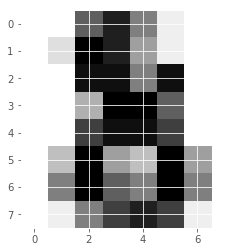

In [24]:
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [25]:
print(digits.target[1796]) # Above image is an 8

8


In [26]:
X = digits.data
y = digits.target

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)
#  Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [29]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Finding the best value of n_neighbors

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [ ]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


#### From the above graph, it's obvious that when n=3, the accuracy is the highest on test set. Above n=7, it tends to underfit

# Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
boston = datasets.load_boston()

In [ ]:
boston.keys()

In [ ]:
X = boston.data
y = boston.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


### Cross-validation

In [ ]:
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

### Regularized regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso

#### Lasso is L1 regularization, Ridge is L2 regularization

In [ ]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X, y)
lasso_coef = lasso.coef_

In [ ]:
plt.plot(range(len(boston.feature_names)), lasso_coef)
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=60)
plt.margins(0.02)
plt.show()

#### Shows that number of rooms is the highest indicator for house price

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve

In [ ]:
digits = datasets.load_digits()

In [ ]:
X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [ ]:
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))


In [ ]:
print(classification_report(y_test, y_pred))

#### ROC curve does not support multinomial logistic regression